### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
coupons = pd.read_csv('data/coupons.csv')

In [6]:
coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




2. Investigate the dataset for missing or problematic data.

In [7]:
# Check for missing values and data types
coupons.info()

# Count missing values per column
coupons.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
destination                 0
passanger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...
    1. The car column had more than 80% missing values and limited analytical relevance. Drop this column entirely.
    2.  Columns such as Bar, CoffeeHouse, CarryAway, and RestaurantLessThan20 contained scattered missing entries. These likely represent survey respondents who skipped the question rather than true no responses. Replace missing categorical values with "Unknown" so the model can treat them as a separate category.
    3.  Numeric columns like temperature had very few or no missing values, so no imputation was required.  If small numeric gaps existed, the median would be the preferred replacement (to reduce outlier influence).


In [8]:
coupons = coupons.drop(columns=['car'])
categorical_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in categorical_cols:
    coupons[col] = coupons[col].fillna('Unknown')
coupons['temperature'] = coupons['temperature'].fillna(coupons['temperature'].median())





4. What proportion of the total observations chose to accept the coupon?



In [10]:
  # Check target variable distribution
coupons['Y'].value_counts(normalize=True) 

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

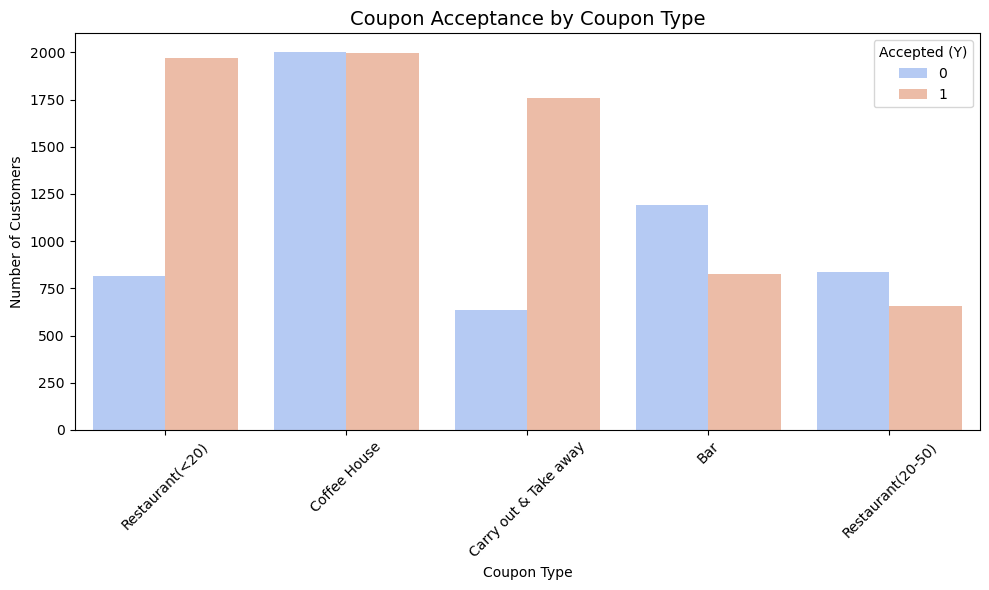

In [11]:

plt.figure(figsize=(10,6))
sns.countplot(data=coupons, x='coupon', hue='Y', palette='coolwarm')

plt.title('Coupon Acceptance by Coupon Type', fontsize=14)
plt.xlabel('Coupon Type')
plt.ylabel('Number of Customers')
plt.legend(title='Accepted (Y)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


6. Use a histogram to visualize the temperature column.

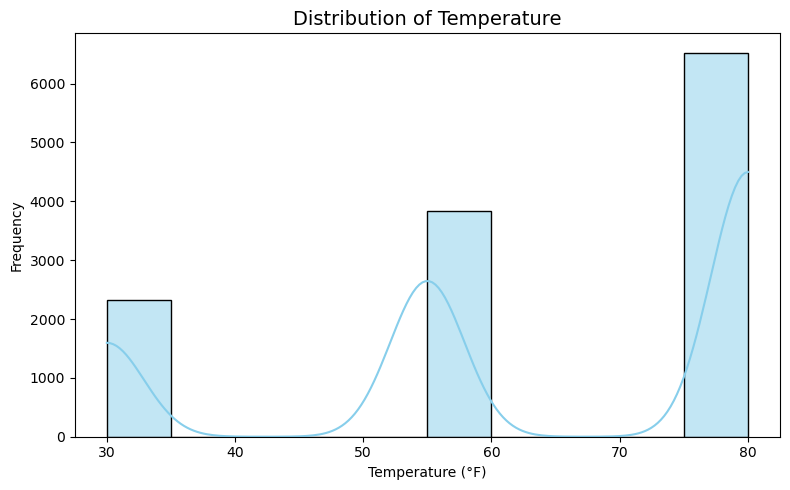

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data=coupons, x='temperature', bins=10, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Temperature', fontsize=14)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
# Create a new DataFrame for Bar coupons only
bar_coupons = coupons[coupons['coupon'] == 'Bar']

# Verify the new DataFrame
bar_coupons.info()

# Display first few records
bar_coupons.head()


<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   2017 non-null   object
 15  CoffeeHouse           2017 non-null   obje

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [14]:
# Calculate the proportion of accepted bar coupons
accepted_bar = bar_coupons['Y'].mean()

print(f"Proportion of bar coupons accepted: {accepted_bar:.2f}")


Proportion of bar coupons accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [22]:
# Group 1: 3 or fewer visits per month
group1 = bar_coupons[bar_coupons['Bar_num'] <= 3]
accept_rate_group1 = group1['Y'].mean()

# Group 2: more than 3 visits per month
group2 = bar_coupons[bar_coupons['Bar_num'] > 3]
accept_rate_group2 = group2['Y'].mean()

print(f"Acceptance rate (<=3 times/month): {accept_rate_group1*100:.2f}%")
print(f"Acceptance rate (>3 times/month): {accept_rate_group2*100:.2f}%")






Acceptance rate (<=3 times/month): 33.66%
Acceptance rate (>3 times/month): 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [24]:
# Map Bar visit ranges to numeric values
bar_mapping = {
    'never': 0,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
}

# Make a copy to avoid SettingWithCopyWarning
bar_coupons = bar_coupons.copy()
bar_coupons['Bar_num'] = bar_coupons['Bar'].map(bar_mapping)

# Ensure 'age' is numeric
bar_coupons['age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')

# Group 1: Bar visits >1 and age >25
group1 = bar_coupons[(bar_coupons['Bar_num'] > 1) & (bar_coupons['age'] > 25)]

# Group 2: all other drivers
group2 = bar_coupons[~((bar_coupons['Bar_num'] > 1) & (bar_coupons['age'] > 25))]

# Acceptance rates
accept_rate_group1 = group1['Y'].mean()
accept_rate_group2 = group2['Y'].mean()

print(f"Acceptance rate (Bar>1 & Age>25): {accept_rate_group1*100:.2f}%")
print(f"Acceptance rate (All others): {accept_rate_group2*100:.2f}%")

# Difference
diff = accept_rate_group1 - accept_rate_group2
print(f"Difference in acceptance rate: {diff*100:.2f}%")


Acceptance rate (Bar>1 & Age>25): 69.97%
Acceptance rate (All others): 34.86%
Difference in acceptance rate: 35.12%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [25]:
# Make a copy to avoid warnings
bar_coupons = bar_coupons.copy()

# Map Bar visit ranges to numeric values
bar_mapping = {
    'never': 0,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
}
bar_coupons['Bar_num'] = bar_coupons['Bar'].map(bar_mapping)

# Group 1: Bar visits >1 AND passenger not kid AND occupation not Farming/Fishing/Forestry
excluded_occupations = ['Farming', 'Fishing', 'Forestry']

group1 = bar_coupons[
    (bar_coupons['Bar_num'] > 1) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (~bar_coupons['occupation'].isin(excluded_occupations))
]

# Group 2: all other drivers
group2 = bar_coupons[~(
    (bar_coupons['Bar_num'] > 1) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (~bar_coupons['occupation'].isin(excluded_occupations))
)]

# Acceptance rates
accept_rate_group1 = group1['Y'].mean()
accept_rate_group2 = group2['Y'].mean()

print(f"Acceptance rate (Bar>1, Passenger!=Kid, Occupation not F/F/F): {accept_rate_group1*100:.2f}%")
print(f"Acceptance rate (All others): {accept_rate_group2*100:.2f}%")

# Difference
diff = accept_rate_group1 - accept_rate_group2
print(f"Difference in acceptance rate: {diff*100:.2f}%")



Acceptance rate (Bar>1, Passenger!=Kid, Occupation not F/F/F): 71.32%
Acceptance rate (All others): 29.60%
Difference in acceptance rate: 41.72%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [27]:
# Make a copy to avoid warnings
coupons_df = bar_coupons.copy()

# Map Bar visits to numeric
bar_mapping = {
    'never': 0,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
}
coupons_df['Bar_num'] = coupons_df['Bar'].map(bar_mapping)

# Map RestaurantLessThan20 visits to numeric
rest_mapping = {
    'never': 0,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
}
coupons_df['RestaurantLessThan20_num'] = coupons_df['RestaurantLessThan20'].map(rest_mapping)

# Ensure numeric age and income
coupons_df['age'] = pd.to_numeric(coupons_df['age'], errors='coerce')
# Using raw string to avoid invalid escape sequence
coupons_df['income_num'] = pd.to_numeric(
    coupons_df['income'].str.replace(r'[\$,]', '', regex=True).str.split().str[0],
    errors='coerce'
)

# Condition 1: Bar>1, passenger not kid, maritalStatus not widowed
cond1 = (coupons_df['Bar_num'] > 1) & (coupons_df['passanger'] != 'Kid(s)') & (coupons_df['maritalStatus'] != 'Widowed')

# Condition 2: Bar>1 and age <30
cond2 = (coupons_df['Bar_num'] > 1) & (coupons_df['age'] < 30)

# Condition 3: Cheap restaurants >4 times/month and income < 50000
cond3 = (coupons_df['RestaurantLessThan20_num'] > 4) & (coupons_df['income_num'] < 50000)

# Combine all three with OR
target_group = coupons_df[cond1 | cond2 | cond3]

# All others
other_group = coupons_df[~(cond1 | cond2 | cond3)]

# Acceptance rates
accept_rate_target = target_group['Y'].mean()
accept_rate_others = other_group['Y'].mean()

print(f"Acceptance rate (Target group): {accept_rate_target*100:.2f}%")
print(f"Acceptance rate (All others): {accept_rate_others*100:.2f}%")
print(f"Difference: {(accept_rate_target - accept_rate_others)*100:.2f}%")


Acceptance rate (Target group): 61.24%
Acceptance rate (All others): 29.64%
Difference: 31.60%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Based on the analysis :

1. Frequent Bar Visitors (more than 1–3 times per month) are more likely to accept bar coupons. 

2. Younger Adults are more responsive to bar coupons, likely because bars are more relevant to their social habits.

3. If a driver is traveling with kids, they are less likely to accept a bar coupon.

4. Folks with moderate income (e.g., under $50k) who also frequent bars or cheap restaurants may find coupons more attractive.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  